In [3]:
#install required libraries
import pandas as pd
import numpy as np#data visualization packages
import matplotlib.pyplot as plt#keras packages
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [4]:
#read mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [31]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()#fit and transform training dataset
X_train = minmax.fit_transform(X_train)#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


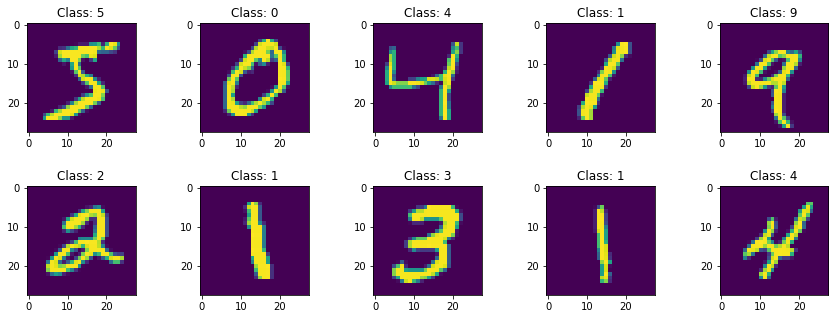

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [8]:
#initializing CNN model
classifier_e25 = Sequential()#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#model summary
classifier_e25.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=25, verbose=0)

In [10]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)#calculate evaluation parameters
f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'F1 score'      : round(f1_e25,3),
                      'ROC AUC score' : round(roc_e25,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])#print evaluation dataframe
display(stats_e25)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


,Test accuracy,F1 score,ROC AUC score,Total Loss
0,97.99,0.98,1.0,0.12


In [32]:
confusion_matrix(y_test, np.argmax(classifier_e25.predict(X_test),axis=1))

array([[ 972,    1,    1,    1,    0,    0,    2,    0,    1,    2],
       [   0, 1126,    2,    1,    0,    2,    1,    1,    2,    0],
       [   0,    0, 1019,    2,    0,    0,    1,    6,    4,    0],
       [   0,    0,    8,  987,    0,    4,    0,    4,    5,    2],
       [   1,    0,    5,    0,  948,    0,    4,    3,    1,   20],
       [   2,    0,    0,    7,    2,  871,    4,    0,    5,    1],
       [   5,    3,    3,    1,    3,    7,  936,    0,    0,    0],
       [   1,    1,    9,    2,    1,    0,    0, 1006,    2,    6],
       [   8,    0,    1,    5,    0,    8,    0,    3,  945,    4],
       [   1,    2,    1,    3,    2,    3,    0,    6,    2,  989]])

In [34]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

confusion = classification_report(y_test, np.argmax(classifier_e25.predict(X_test),axis=1))
print(confusion)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
classifier_e25.save('ann.h5')